# Maximum Likelihood Estimation
Prepared by Jiao Shi for the Winter Camp of Quantitative Economics and Finance, Shenzhen 2019


Maximum likelihood estimation (MLE) is a widely used estimation method. The core idea is to ask, given observations, what are the values of parameters under which the observed outcome is most likely to occur.

Let's illustrate the basic idea with a simple example, before moving to more complete applications.



## Bernoulli random variable
Let's start with a familiar example of a coin flip. Assume that we are not sure how a coin is weighted.

Denote a Head with H and Tail with T. The probability of getting H is $\pi$. 

We flip the coin N times, and denote the outcome of the flip $i$ by $d_i$. What's the joint probability of a given sample $\{d_i\}_{i=1}^N $?

$$
L(\{d_i\}_{i=1}^N,\pi)= \prod_{i=1}^{N}\pi^{d_i}(1-\pi)^{(1-d_i)}
= \pi^{N_H}(1-\pi)^{N_T}
$$

where $N_H$ is the number of times "H" appeared and $N_T$ is the number of times "T" appeared. Clearly $N_H + N_T = N$.

The idea of maximum likelihood estiamtion is to treat the "likelihood function" $L$ as a function of the unknown parameter $\pi$, and choose the value of $\pi$ that maximizes $L$.

$$
\hat{\pi}_{ML}= \arg \max_{\pi} L(\pi)
$$

The likelihood function $L$ is multiplicative. In practice, we often take the the natural logarithm of $L$ before finding the maximizer. (As the value of $\pi$ that maximizes a function also maximizes an increasing monotonic function of that function.)

Write the log likelihood function:

$$
\mathcal{L}(\pi) \equiv \ln L(\pi) = N_H\ln\pi + N_T\ln(1-\pi)
$$

At the value of $\pi$ where the log likelihood function is maximized:
- the first derivative of the log-likelihood function will be equal to 0 (a.k.a. the first-order condition)
- the second derivative would be negative (a.k.a. the second-order condition)



The maximum likelihood estimator of $\pi$ is the solution to the first order condition
$$
\frac {d\mathcal{L}(\hat{\pi}_{ML})}{d\pi}=0
$$

which has the convenient analytical solution

$$
\hat{\pi}_{ML}=\frac {N_H}{N_H + N_T} = \frac{N_H}{N}.
$$

### Numerical Example: Bernoulli random variable

Let's visualize the likelihood function and check our analytical solution using numerical simulation in Python.

Denote a Head by 1, and a Tail by 0. First let's define a function <font color = blue> likelihood </font> that returns the probability of observing a given outcome, conditioning on the parameter $\pi$.




In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def likelihood(observation, p):
    # observation records the outcome of coin flips
    # p is the probability of observing Head
    
    n = len(observation)
    likelihood = 1
    
    for i in range(n):
        head = p**observation[i]
        tail = (1-p)**(1-observation[i])
        single_trial = head*tail
        likelihood = likelihood*single_trial
    
    return likelihood 

In [6]:
# Check: what's the probability of flipping a fair coin twice and get "Head" both times?
a = [1,1]
likelihood(a,0.5)

0.25

What if we suspect that the coin was not fair?

Say, there could be a 75% chance of getting heads.

What's the likelihood of observing two consecutive heads if probability of Head is 75%?

In [7]:
c = [1,1]
likelihood(c,0.75)

0.5625

Thus the coin is more likely to be unfair than fair.

If we have no prior belief on how the coin is weighted, then based on the observed outcome, the parameter value under which our observation {H, H} is most likely is 1.


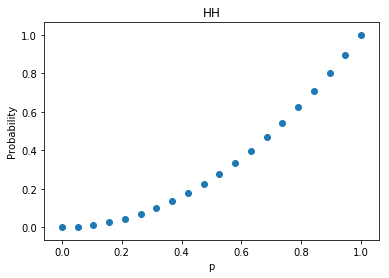

In [8]:
n_p = 20
p_vec = np.linspace(0,1,n_p)
prob_1 = []
for i in range(n_p):
    prob_1.append(likelihood(c,p_vec[i]))
    
    
plt.scatter(p_vec,prob_1)
plt.xlabel('p')
plt.ylabel('Probability')
plt.title('HH')
plt.show()

Let's continue flipping the coin, and say the third time, we get a Tail.

How will that change our "maximum likelihood" parameter value $\hat{\pi}$?


In [9]:
d = [1,1,0]

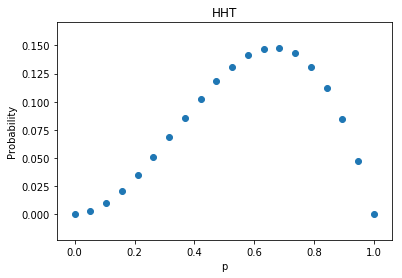

In [10]:
n_p = 20 
p_vec = np.linspace(0,1,n_p)
prob_2 = []
for i in range(n_p):
    prob_2.append(likelihood(d,p_vec[i]))
    
    
plt.scatter(p_vec,prob_2)
plt.xlabel('p')
plt.ylabel('Probability')
plt.title('HHT')
plt.show()

From our analytical solution, we know that the maximizer occurs at $\hat{\pi} = 2/3$.

In [11]:
likelihood(d,2/3)

0.14814814814814817

In [12]:
# How likely is the case that the coin is fair?
likelihood(d,0.5)

0.125

If we ask how confident we are about our maximum likelihood estimator. We can compute and see that given the outcome {H,H,T}, it is 18.5% more likely that the coin turns up a Head with 2/3 chance than the case that the coin is fair.

In [13]:
(likelihood(d,2/3) - likelihood(d,0.5))/likelihood(d,0.5)

0.18518518518518534

Suppose instead of three flips, we observe the pattern (the particular ratio of H/T) with 300 flips. Would that increase our confidence?


In [14]:
e = [1,1,0]*100

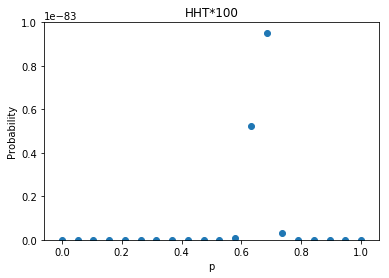

In [15]:
n_p = 20 
p_vec = np.linspace(0,1,n_p)
prob_3 = []
for i in range(n_p):
    prob_3.append(likelihood(e,p_vec[i]))
    


    
plt.scatter(p_vec,prob_3)
plt.xlabel('p')
plt.ylabel('Probability')
plt.title('HHT*100')
plt.ylim(ymin = 0, ymax = 10**(-83))
plt.show()

In [16]:
likelihood(e,2/3)/likelihood(e,0.5)

23912303.602879208

It is 23.9 million times more likely that the true probability of Head is 2/3 instead of 1/2.

We introduced the basic idea of maximum likelihood estimation in a simple example in which the estimator can be analytically solved.

In most practical cases, analytical solutions cannot be directly obtained. "Eyeballing" the likelihood function graph is also infeasible. (Imagine estimating $n$ parameters instead of 1 or 2.)

Next we will study a real-life case by replicating Daniel Treisman’s (2016) paper, [Russia’s Billionaires](http://pubs.aeaweb.org/doi/pdfplus/10.1257/aer.p20161068), which connects the number of billionaires in a country to its economic characteristics.

Treisman [[Tre16]](https://lectures.quantecon.org/py/zreferences.html#treisman2016) is interested in estimating the number of billionaires in different countries, assuming that the dependent variable (number of billionaires) follows a Poisson distribution.

### In-class exercise 1: The negative exponential distribution

The *negative exponential distribution* is defined on the positive real line $R_+$. Its cumulative distribution function (CDF) and probability distribution function (PDF) are given by

$$
F(t)=1-\exp(-\alpha t), \alpha>0, t>0
$$

$$
f(t)=\alpha \exp(-\alpha t).
$$

The parameter $\alpha$ completely characterizes the distribution.

Say the random variable $T$ is the duration of time an individual spend unemployed. We have a random sample of N individuals, and assume that each individual's unemployment duration is an independent draw from the same distribution $F$.

1. Given a sample {$t_1, t_2, ..., t_N$}, write down the likelihood function and log likelihood function.
2. Check if there's a unique maximizer of the likelihood function. If so, find the maximum likelihood estimator $\hat{\alpha}_{ML}$.

## Poisson Regression

In many occasions we need to work with **count variables**. A count variable can take on nonnegative integer values {0, 1, 2,...}.
- the number of times an individual runs into a traffic accident in a year
- the number of children ever born to a women

Of particular interests are cases in which the dependent variable takes on relatively few value, including zero.

The [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) is commonly used to model count data.



The probability mass function (pmf) of a Poisson distribution is

$$
f(y) = \frac{\mu^{y}}{y!} e^{-\mu},
\qquad y = 0, 1, 2, \ldots, \infty
$$

A Poisson distribution is completely determined by its mean. We can plot the Poisson distribution over $ y $ for different values of $ \mu $ as follows

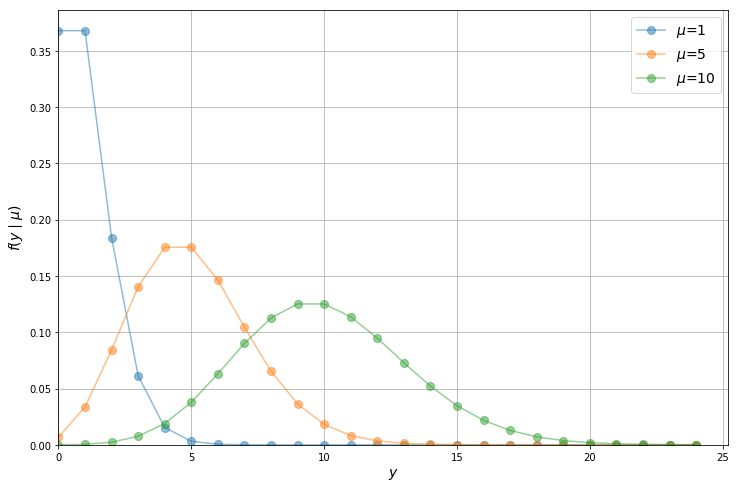

In [1]:
from numpy import exp
from scipy.special import factorial
import matplotlib.pyplot as plt
%matplotlib inline

poisson_pmf = lambda y, μ: μ**y / factorial(y) * exp(-μ)
y_values = range(0, 25)

fig, ax = plt.subplots(figsize=(12, 8))

for μ in [1, 5, 10]:
    distribution = []
    for y_i in y_values:
        distribution.append(poisson_pmf(y_i, μ))
    ax.plot(y_values,
            distribution,
            label=f'$\mu$={μ}',
            alpha=0.5,
            marker='o',
            markersize=8)

ax.grid()
ax.set_xlabel('$y$', fontsize=14)
ax.set_ylabel('$f(y \mid \mu)$', fontsize=14)
ax.axis(xmin=0, ymin=0)
ax.legend(fontsize=14)

plt.show()

Notice that the Poisson distribution begins to resemble a normal distribution as the mean of $ y $ increases

Let’s have a look at the distribution of the data we’ll be working with in this lecture

Treisman’s main source of data is *Forbes’* annual rankings of billionaires and their estimated net worth

The dataset `mle/fp.dta` can be downloaded <a href=/_static/code/mle/fp.dta download>here</a>
or from its [AER page](https://www.aeaweb.org/articles?id=10.1257/aer.p20161068)

In [2]:
import pandas as pd
pd.options.display.max_columns = 10

# Load in data and view
df = pd.read_stata('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/mle/fp.dta')
df.head()

,country,ccode,year,cyear,numbil,...,topint08,rintr,noyrs,roflaw,nrrents
0,United States,2.0,1990.0,21990.0,NaN,...,39.799999,4.988405,20.0,1.61,NaN
1,United States,2.0,1991.0,21991.0,NaN,...,39.799999,4.988405,20.0,1.61,NaN
2,United States,2.0,1992.0,21992.0,NaN,...,39.799999,4.988405,20.0,1.61,NaN
3,United States,2.0,1993.0,21993.0,NaN,...,39.799999,4.988405,20.0,1.61,NaN
4,United States,2.0,1994.0,21994.0,NaN,...,39.799999,4.988405,20.0,1.61,NaN


Using a histogram, we can view the distribution of the number of
billionaires per country, `numbil0`, in 2008 (the United States is
dropped for plotting purposes)

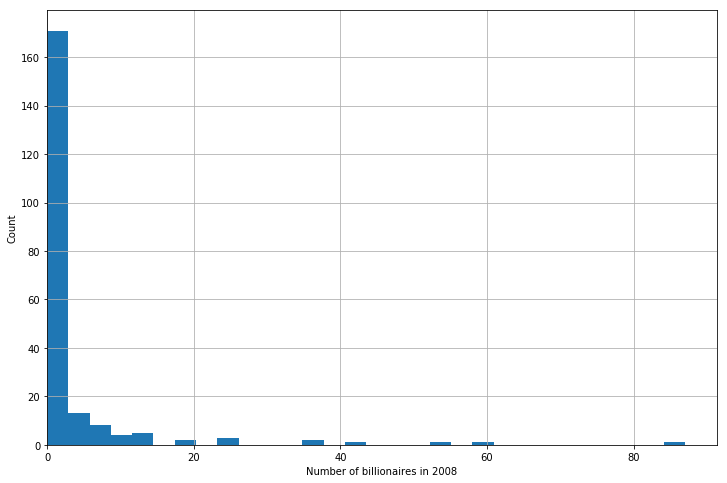

In [3]:
numbil0_2008 = df[(df['year'] == 2008) & (
    df['country'] != 'United States')].loc[:, 'numbil0']

plt.subplots(figsize=(12, 8))
plt.hist(numbil0_2008, bins=30)
plt.xlim(xmin=0)
plt.grid()
plt.xlabel('Number of billionaires in 2008')
plt.ylabel('Count')
plt.show()

From the histogram, it appears that the Poisson assumption is not unreasonable (albeit with a very low $ \mu $ and some outliers)

## Conditional Distributions

In Treisman’s paper, the dependent variable — the number of billionaires $ y_i $ in country $ i $ — is modeled as a function of GDP per capita, population size, and years membership in GATT and WTO, etc.

Hence, the distribution of $ y_i $ needs to be conditioned on the vector of explanatory variables $ \mathbf{x}_i $

The standard formulation — the so-called *poisson regression* model — is as follows:


<a id='equation-poissonreg'></a>
$$
f(y_i \mid \mathbf{x}_i) = \frac{\mu_i^{y_i}}{y_i!} e^{-\mu_i}; \qquad y_i = 0, 1, 2, \ldots , \infty . \tag{1}
$$

$$
\text{where}\ \mu_i
     = \exp(\mathbf{x}_i' \boldsymbol{\beta})
     = \exp(\beta_0 + \beta_1 x_{i1} + \ldots + \beta_k x_{ik})
$$

To illustrate the idea that the distribution of $ y_i $ depends on
$ \mathbf{x}_i $ let’s run a simple simulation

We use our `poisson_pmf` function from above and arbitrary values for
$ \boldsymbol{\beta} $ and $ \mathbf{x}_i $

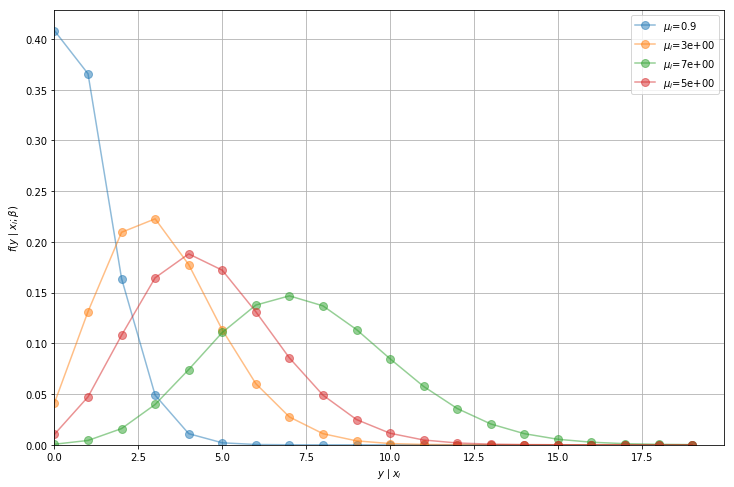

In [4]:
import numpy as np

y_values = range(0, 20)

# Define a parameter vector with estimates
β = np.array([0.26, 0.18, 0.25, -0.1, -0.22]).T

# Create some observations X
datasets = [np.array([0, 1, 1, 1, 2]),
            np.array([2, 3, 2, 4, 0]),
            np.array([3, 4, 5, 3, 2]),
            np.array([6, 5, 4, 4, 7])]


fig, ax = plt.subplots(figsize=(12, 8))

for X in datasets:
    μ = exp(X @ β)
    distribution = []
    for y_i in y_values:
        distribution.append(poisson_pmf(y_i, μ))
    ax.plot(y_values,
            distribution,
            label=f'$\mu_i$={μ:.1}',
            marker='o',
            markersize=8,
            alpha=0.5)

ax.grid()
ax.legend()
ax.set_xlabel('$y \mid x_i$')
ax.set_ylabel(r'$f(y \mid x_i; \beta )$')
ax.axis(xmin=0, ymin=0)
plt.show()

We can see that the distribution of $ y_i $ is conditional on
$ \mathbf{x}_i $ ($ \mu_i $ is no longer constant)

## Maximum Likelihood Estimation

In our model for number of billionaires, the conditional distribution
contains 4 ($ k = 4 $) parameters that we need to estimate

We will label our entire parameter vector as $ \boldsymbol{\beta} $ where

$$
\boldsymbol{\beta} = \begin{bmatrix}
                            \beta_0 \\
                            \beta_1 \\
                            \beta_2 \\
                            \beta_3 \\
                      \end{bmatrix}
$$

To estimate the model using MLE, we want find the $ \hat{\boldsymbol{\beta}} $ that best "fits" our data, in the sense that the likelihood of the given observation is maximized. 

First we need to construct the likelihood function $ \mathcal{L}(\boldsymbol{\beta}) $

The joint pmf of our data (which is distributed as a
conditional Poisson distribution) can be written as

$$
f(y_1, y_2, \ldots, y_n \mid \mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_n; \boldsymbol{\beta})
    = \prod_{i=1}^{n} \frac{\mu_i^{y_i}}{y_i!} e^{-\mu_i}
$$

$ y_i $ is conditional on both the values of $ \mathbf{x}_i $ and the
parameters $ \boldsymbol{\beta} $

The likelihood function is the same as the joint pmf, but treats the
parameter $ \boldsymbol{\beta} $ as a random variable and takes the observations
$ (y_i, \mathbf{x}_i) $ as given

$$
\begin{split}
\mathcal{L}(\beta \mid y_1, y_2, \ldots, y_n \ ; \ \mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_n) = &
\prod_{i=1}^{n} \frac{\mu_i^{y_i}}{y_i!} e^{-\mu_i} \\ = &
f(y_1, y_2, \ldots, y_n \mid  \ \mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_n ; \beta)
\end{split}
$$

Now that we have our likelihood function, we want to find the $ \hat{\boldsymbol{\beta}} $ that yields the maximum likelihood value

$$
\underset{\boldsymbol{\beta}}{\max} \mathcal{L}(\boldsymbol{\beta})
$$

Again it is generally easier to maximize the log-likelihood (consider
differentiating $ f(x) = x \exp(x) $  vs.  $ f(x) = \log(x) + x $)

In our case the log-likelihood is

$$
\begin{split}
\log{ \mathcal{L}} (\boldsymbol{\beta}) = \ &
    \log \Big(
        f(y_1 ; \boldsymbol{\beta})
        \cdot
        f(y_2 ; \boldsymbol{\beta})
        \cdot \ldots \cdot
        f(y_n ; \boldsymbol{\beta})
        \Big) \\
        = &
        \sum_{i=1}^{n} \log{f(y_i ; \boldsymbol{\beta})} \\
        = &
        \sum_{i=1}^{n}
        \log \Big( {\frac{\mu_i^{y_i}}{y_i!} e^{-\mu_i}} \Big) \\
        = &
        \sum_{i=1}^{n} y_i \log{\mu_i} -
        \sum_{i=1}^{n} \mu_i -
        \sum_{i=1}^{n} \log y!
\end{split}
$$

The MLE of the Poisson to the Poisson  for $ \hat{\beta} $ can be obtained by solving

$$
\underset{\beta}{\max} \Big(
\sum_{i=1}^{n} y_i \log{\mu_i} -
\sum_{i=1}^{n} \mu_i -
\sum_{i=1}^{n} \log y! \Big)
$$

However, no analytical solution exists to the above problem – to find the MLE
we need to use numerical methods

## MLE with Numerical Methods

Many distributions do not have nice, analytical solutions and therefore require
numerical methods to solve for parameter estimates

One such numerical method is the Newton-Raphson algorithm

Our goal is find the maximum likelihood estimate $ \hat{\boldsymbol{\beta}} $, at which point:

- the first derivative of the log-likelihood function will be equal to 0
- the second derivative would be negative

(More on optimization in Day 7 lectures.)

Let’s illustrate this by supposing

$$
\log \mathcal{L(\beta)} = - (\beta - 10) ^2 - 10
$$

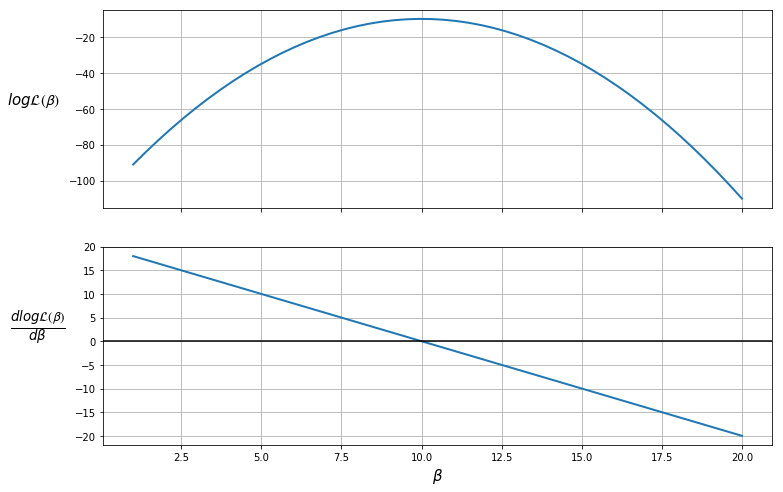

In [6]:
β = np.linspace(1, 20)
logL = -(β - 10) ** 2 - 10
dlogL = -2 * β + 20

fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12, 8))

ax1.plot(β, logL, lw=2)
ax2.plot(β, dlogL, lw=2)

ax1.set_ylabel(r'$log \mathcal{L(\beta)}$',
               rotation=0,
               labelpad=35,
               fontsize=15)
ax2.set_ylabel(r'$\frac{dlog \mathcal{L(\beta)}}{d \beta}$ ',
               rotation=0,
               labelpad=35,
               fontsize=19)
ax2.set_xlabel(r'$\beta$', fontsize=15)
ax1.grid(), ax2.grid()
plt.axhline(c='black')
plt.show()

The plot shows that the maximum likelihood value (the top plot) occurs
when $ \frac{d \log \mathcal{L(\boldsymbol{\beta})}}{d \boldsymbol{\beta}} = 0 $ (the bottom
plot)

Therefore, the likelihood is maximized when $ \beta = 10 $

We can also ensure that this value is a *maximum* (as opposed to a
minimum) by checking that the second derivative (slope of the bottom
plot) is negative



### The Newton-Raphson algorithm

To use the algorithm, we take an initial guess at the maximum value,
$ \beta_0 $ (the OLS parameter estimates might be a reasonable
guess), then

1. Use the updating rule to iterate the algorithm  
  $$
  \boldsymbol{\beta}_{(k+1)} = \boldsymbol{\beta}_{(k)} - \frac{G(\boldsymbol{\beta}_{(k)})} {H(\boldsymbol{\beta}_{(k)})}
  $$
  where:  
  $$
  G(\boldsymbol{\beta}_{(k)}) = \frac{d \log \mathcal{L(\boldsymbol{\beta}_{(k)})}}{d \boldsymbol{\beta}_{(k)}} \\
  H(\boldsymbol{\beta}_{(k)}) = \frac{d^2 \log \mathcal{L(\boldsymbol{\beta}_{(k)})}}{d \boldsymbol{\beta}_{(k)}^2}
  $$
1. Check whether $ \boldsymbol{\beta}_{(k+1)} - \boldsymbol{\beta}_{(k)} < tol $  
  - If true, then stop iterating and set
    $ \hat{\boldsymbol{\beta}} = \boldsymbol{\beta}_{(k+1)} $  
  - If false, then update $ \boldsymbol{\beta}_{(k+1)} $  


As can be seen from the updating equation,
$ \boldsymbol{\beta}_{(k+1)} = \boldsymbol{\beta}_{(k)} $ only when
$ G(\boldsymbol{\beta}_{(k)}) = 0 $ ie. where the first derivative is equal to 0

(In practice, we stop iterating when the difference is below a small
tolerance threshold)



To have a glimpse into why this works, assume $\boldsymbol{\beta}$ is a scalar for simplicity. Start with an initial guess of the parameter $\boldsymbol{\beta_0}$, and do the first-order Taylor expansion of the first-order condition around the initial value

$$
0 = \frac{d \log \mathcal{L(\boldsymbol{\beta})}}{d \boldsymbol{\beta}} \simeq
\frac{d \log \mathcal{L(\boldsymbol{\beta_0})}}{d \boldsymbol{\beta}}
+(\hat{\boldsymbol{\beta}}_{ML} - \boldsymbol{\beta_0})\frac{d^2 \log \mathcal{L(\boldsymbol{\beta_0})}}{d \boldsymbol{\beta^2}}
$$

which can be rearranged as:

$$
\hat{\boldsymbol{\beta}}_{ML} = \boldsymbol{\beta_0}
- \left[\frac{d^{2}\log\mathcal{L\left(\beta_{0}\right)}}{d\beta^{2}}\right]^{-1}\frac{d\log\mathcal{L\left(\beta_{0}\right)}}{d\beta}
$$

If the log likelihood function is "well-behaved" (i.e. globally concave in $\beta$), then $\hat{\boldsymbol{\beta}}_{ML}$ that we solved from the equation above should be closer to the true solution than the initial guess.

### In-class exercise 2
Back to the negative exponential distribution in in-class exercise 1. Say we have a sample of $N = 100$, and the total time in unemployment of the sample members was 148 months.

Use the Newton-Raphson algorithm to find the maximum likelihood estimate of $\alpha$, with an initial guess $\alpha_0 = 5$.

Let’s have a go at implementing the Newton-Raphson algorithm

First, we’ll create a class called `PoissonRegression` so we can
easily recompute the values of the log likelihood, gradient and Hessian
for every iteration

In [7]:
class PoissonRegression:

    def __init__(self, y, X, β):
        self.X, self.y, self.β = X, y, β
        self.n, self.k = X.shape

    def μ(self):
        return np.exp(self.X @ self.β.T)

    def logL(self):
        y = self.y
        μ = self.μ()
        return np.sum(y * np.log(μ) - μ - np.log(factorial(y)))

    def G(self):
        μ = self.μ()
        return ((self.y - μ) @ self.X).reshape(self.k, 1)

    def H(self):
        X = self.X
        μ = self.μ()
        return -(μ * X.T @ X)

Our function `newton_raphson` will take a `PoissonRegression` object
that has an initial guess of the parameter vector $ \boldsymbol{\beta}_0 $

The algorithm will update the parameter vector according to the updating
rule, and recalculate the gradient and Hessian matrices at the new
parameter estimates

Iteration will end when either:

- The difference between the parameter and the updated parameter is below a tolerance level  
- The maximum number of iterations has been achieved (meaning convergence is not achieved)  


So we can get an idea of what’s going on while the algorithm is running,
an option `display=True` is added to print out values at each
iteration

In [8]:
def newton_raphson(model, tol=1e-3, max_iter=1000, display=True):

    i = 0
    error = 100  # Initial error value

    # Print header of output
    if display:
        header = f'{"Iteration_k":<13}{"Log-likelihood":<16}{"θ":<60}'
        print(header)
        print("-" * len(header))

    # While loop runs while any value in error is greater
    # than the tolerance until max iterations are reached
    while np.any(error > tol) and i < max_iter:
        H, G = model.H(), model.G()
        β_new = model.β - (np.linalg.inv(H) @ G).T
        error = β_new - model.β
        model.β = β_new.flatten()

        # Print iterations
        if display:
            β_list = [f'{t:.3}' for t in list(model.β)]
            update = f'{i:<13}{model.logL():<16.8}{β_list}'
            print(update)

        i += 1

    print(f'Number of iterations: {i}')
    print(f'β_hat = {model.β}')

    return model.β

Let’s try out our algorithm with a small dataset of 5 observations and 3
variables in $ \mathbf{X} $

In [9]:
X = np.array([[1, 2, 5],
              [1, 1, 3],
              [1, 4, 2],
              [1, 5, 2],
              [1, 3, 1]])

y = np.array([1, 0, 1, 1, 0])

# Take a guess at initial βs
init_β = np.array([0.1, 0.1, 0.1])

# Create an object with Poisson model values
poi = PoissonRegression(y, X, β=init_β)

# Use newton_raphson to find the MLE
β_hat = newton_raphson(poi, display=True)

Iteration_k  Log-likelihood  θ                                                           
-----------------------------------------------------------------------------------------
0            -4.3447622      ['-1.49', '0.265', '0.244']
1            -3.5742413      ['-3.38', '0.528', '0.474']
2            -3.3999526      ['-5.06', '0.782', '0.702']
3            -3.3788646      ['-5.92', '0.909', '0.82']
4            -3.3783559      ['-6.07', '0.933', '0.843']
5            -3.3783555      ['-6.08', '0.933', '0.843']
Number of iterations: 6
β_hat = [-6.07848205  0.93340226  0.84329625]


As this was a simple model with few observations, the algorithm achieved
convergence in only 6 iterations

You can see that with each iteration, the log-likelihood value increased

Remember, our objective was to maximize the log-likelihood function,
which the algorithm has worked to achieve

Also note that the increase in $ \log \mathcal{L}(\boldsymbol{\beta}_{(k)}) $
becomes smaller with each iteration

This is because the gradient is approaching 0 as we reach the maximum,
and therefore the numerator in our updating equation is becoming smaller

The gradient vector should be close to 0 at $ \hat{\boldsymbol{\beta}} $

In [10]:
poi.G()

array([[-3.95169228e-07],
       [-1.00114805e-06],
       [-7.73114563e-07]])

The iterative process can be visualized in the following diagram, where
the maximum is found at $ \beta = 10 $

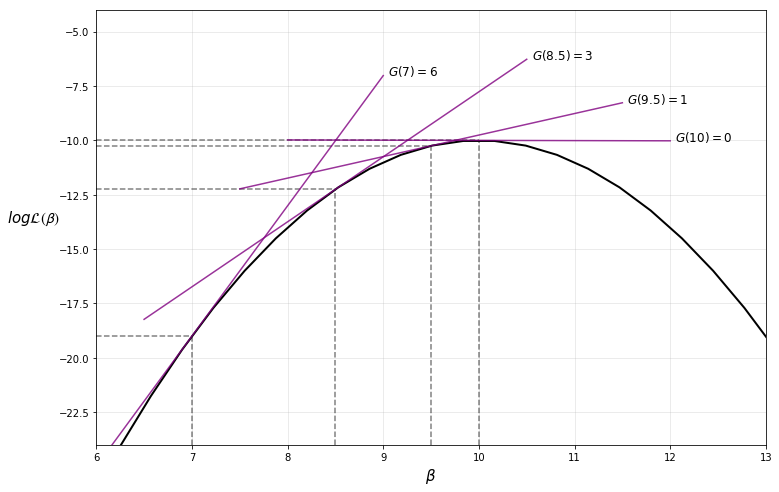

In [11]:
logL = lambda x: -(x - 10) ** 2 - 10

def find_tangent(β, a=0.01):
    y1 = logL(β)
    y2 = logL(β+a)
    x = np.array([[β, 1], [β+a, 1]])
    m, c = np.linalg.lstsq(x, np.array([y1, y2]), rcond=None)[0]
    return m, c

β = np.linspace(2, 18)
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(β, logL(β), lw=2, c='black')

for β in [7, 8.5, 9.5, 10]:
    β_line = np.linspace(β-2, β+2)
    m, c = find_tangent(β)
    y = m * β_line + c
    ax.plot(β_line, y, '-', c='purple', alpha=0.8)
    ax.text(β+2.05, y[-1], f'$G({β}) = {abs(m):.0f}$', fontsize=12)
    ax.vlines(β, -24, logL(β), linestyles='--', alpha=0.5)
    ax.hlines(logL(β), 6, β, linestyles='--', alpha=0.5)

ax.set(ylim=(-24, -4), xlim=(6, 13))
ax.set_xlabel(r'$\beta$', fontsize=15)
ax.set_ylabel(r'$log \mathcal{L(\beta)}$',
               rotation=0,
               labelpad=25,
               fontsize=15)
ax.grid(alpha=0.3)
plt.show()

Note that our implementation of the Newton-Raphson algorithm is rather
basic — for more robust implementations see,
for example, [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html)

## Maximum Likelihood Estimation with `statsmodels`

Now that we know what’s going on under the hood, we can apply MLE to an interesting application

We’ll use the Poisson regression model in `statsmodels` to obtain
richer output with standard errors, test values, and more

`statsmodels` uses the same algorithm as above to find the maximum
likelihood estimates

Before we begin, let’s re-estimate our simple model with `statsmodels`
to confirm we obtain the same coefficients and log-likelihood value

In [12]:
from statsmodels.api import Poisson
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

X = np.array([[1, 2, 5],
              [1, 1, 3],
              [1, 4, 2],
              [1, 5, 2],
              [1, 3, 1]])

y = np.array([1, 0, 1, 1, 0])

stats_poisson = Poisson(y, X).fit()
print(stats_poisson.summary())

Optimization terminated successfully.
         Current function value: 0.675671
         Iterations 7
                          Poisson Regression Results                          
Dep. Variable:                      y   No. Observations:                    5
Model:                        Poisson   Df Residuals:                        2
Method:                           MLE   Df Model:                            2
Date:                Mon, 07 Jan 2019   Pseudo R-squ.:                  0.2546
Time:                        12:10:09   Log-Likelihood:                -3.3784
converged:                       True   LL-Null:                       -4.5325
                                        LLR p-value:                    0.3153
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.0785      5.279     -1.151      0.250     -16.425       4.268
x1             0.9334      0.

Now let’s replicate results from Daniel Treisman’s paper, [Russia’s
Billionaires](http://pubs.aeaweb.org/doi/pdfplus/10.1257/aer.p20161068),
mentioned earlier in the lecture

Treisman starts by estimating equation [(1)](#equation-poissonreg), where:

- $ y_i $ is $ {number\ of\ billionaires}_i $  
- $ x_{i1} $ is $ \log{GDP\ per\ capita}_i $  
- $ x_{i2} $ is $ \log{population}_i $  
- $ x_{i3} $ is $ {years\ in\ GATT}_i $ – years membership in GATT and WTO (to proxy access to international markets)  


The paper only considers the year 2008 for estimation

We will set up our variables for estimation like so (you should have the
data assigned to `df` from earlier in the lecture)

In [13]:
# Keep only year 2008
df = df[df['year'] == 2008]

# Add a constant
df['const'] = 1

# Variable sets
reg1 = ['const', 'lngdppc', 'lnpop', 'gattwto08']
reg2 = ['const', 'lngdppc', 'lnpop',
        'gattwto08', 'lnmcap08', 'rintr', 'topint08']
reg3 = ['const', 'lngdppc', 'lnpop', 'gattwto08', 'lnmcap08',
        'rintr', 'topint08', 'nrrents', 'roflaw']

Then we can use the `Poisson` function from `statsmodels` to fit the
model

We’ll use robust standard errors as in the author’s paper

In [14]:
import statsmodels.api as sm

# Specify model
poisson_reg = sm.Poisson(df[['numbil0']], df[reg1],
                         missing='drop').fit(cov_type='HC0')
print(poisson_reg.summary())

Optimization terminated successfully.
         Current function value: 2.226090
         Iterations 9
                          Poisson Regression Results                          
Dep. Variable:                numbil0   No. Observations:                  197
Model:                        Poisson   Df Residuals:                      193
Method:                           MLE   Df Model:                            3
Date:                Mon, 07 Jan 2019   Pseudo R-squ.:                  0.8574
Time:                        12:10:09   Log-Likelihood:                -438.54
converged:                       True   LL-Null:                       -3074.7
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -29.0495      2.578    -11.268      0.000     -34.103     -23.997
lngdppc        1.0839      0.

Here we received a warning message saying “Maximum number of iterations has been exceeded.”

Let’s try increasing the maximum number of iterations that the algorithm
is allowed (the `.fit()` docstring tells us the default number of
iterations is 35)

In [15]:
poisson_reg = sm.Poisson(df[['numbil0']], df[reg1],
                         missing='drop').fit(cov_type='HC0', maxiter=100)
print(poisson_reg.summary())

Optimization terminated successfully.
         Current function value: 2.226090
         Iterations 9
                          Poisson Regression Results                          
Dep. Variable:                numbil0   No. Observations:                  197
Model:                        Poisson   Df Residuals:                      193
Method:                           MLE   Df Model:                            3
Date:                Mon, 07 Jan 2019   Pseudo R-squ.:                  0.8574
Time:                        12:10:09   Log-Likelihood:                -438.54
converged:                       True   LL-Null:                       -3074.7
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -29.0495      2.578    -11.268      0.000     -34.103     -23.997
lngdppc        1.0839      0.

Success! The algorithm was able to achieve convergence in 36 iterations

Our output indicates that GDP per capita, population, and years of
membership in the General Agreement in Tariffs and Trade (GATT) are
positively related to the number of billionaires a country has, as
expected

Let’s also estimate the author’s more full-featured models and display
them in a single table

In [16]:
from statsmodels.iolib.summary2 import summary_col

regs = [reg1, reg2, reg3]
reg_names = ['Model 1', 'Model 2', 'Model 3']
info_dict = {'Pseudo R-squared': lambda x: f"{x.prsquared:.2f}",
             'No. observations': lambda x: f"{int(x.nobs):d}"}
regressor_order = ['const',
                   'lngdppc',
                   'lnpop',
                   'gattwto08',
                   'lnmcap08',
                   'rintr',
                   'topint08',
                   'nrrents',
                   'roflaw']
results = []

for reg in regs:
    result = sm.Poisson(df[['numbil0']], df[reg],
                        missing='drop').fit(cov_type='HC0', maxiter=100, disp=0)
    results.append(result)

results_table = summary_col(results=results,
                            float_format='%0.3f',
                            stars=True,
                            model_names=reg_names,
                            info_dict=info_dict,
                            regressor_order=regressor_order)
results_table.add_title('Table 1 - Explaining the Number of Billionaires in 2008')
print(results_table)

Table 1 - Explaining the Number of Billionaires in 2008
                  Model 1    Model 2    Model 3  
-------------------------------------------------
const            -29.050*** -19.444*** -20.858***
                 (2.578)    (4.820)    (4.255)   
lngdppc          1.084***   0.717***   0.737***  
                 (0.138)    (0.244)    (0.233)   
lnpop            1.171***   0.806***   0.929***  
                 (0.097)    (0.213)    (0.195)   
gattwto08        0.006      0.007      0.004     
                 (0.007)    (0.006)    (0.006)   
lnmcap08                    0.399**    0.286*    
                            (0.172)    (0.167)   
rintr                       -0.010     -0.009    
                            (0.010)    (0.010)   
topint08                    -0.051***  -0.058*** 
                            (0.011)    (0.012)   
nrrents                                -0.005    
                                       (0.010)   
roflaw                                 0.203

The output suggests that the frequency of billionaires is positively
correlated with GDP per capita, population size, stock market
capitalization, and negatively correlated with top marginal income tax
rate

To analyze our results by country, we can plot the difference between
the predicted an actual values, then sort from highest to lowest and
plot the first 15

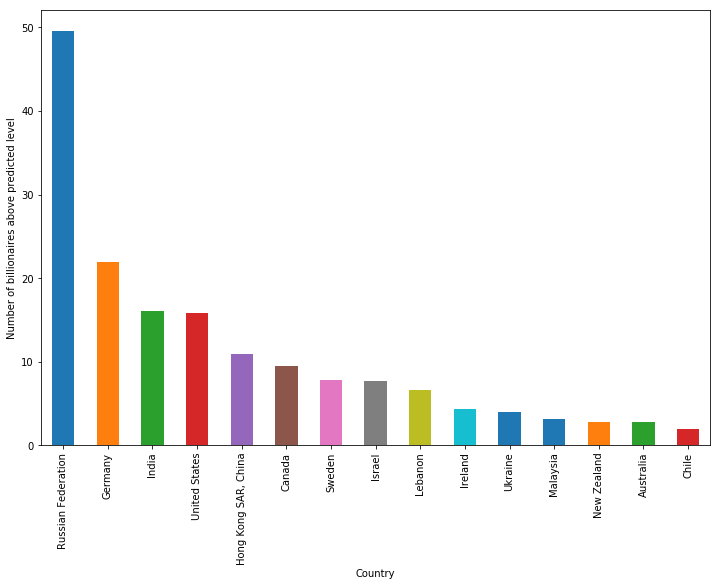

In [17]:
data = ['const', 'lngdppc', 'lnpop', 'gattwto08', 'lnmcap08', 'rintr',
        'topint08', 'nrrents', 'roflaw', 'numbil0', 'country']
results_df = df[data].dropna()

# Use last model (model 3)
results_df['prediction'] = results[-1].predict()

# Calculate difference
results_df['difference'] = results_df['numbil0'] - results_df['prediction']

# Sort in descending order
results_df.sort_values('difference', ascending=False, inplace=True)

# Plot the first 15 data points
results_df[:15].plot('country', 'difference', kind='bar', figsize=(12,8), legend=False)
plt.ylabel('Number of billionaires above predicted level')
plt.xlabel('Country')
plt.show()

As we can see, Russia has by far the highest number of billionaires in
excess of what is predicted by the model (around 50 more than expected)

Treisman uses this empirical result to discuss possible reasons for
Russia’s excess of billionaires, including the origination of wealth in
Russia, the political climate, and the history of privatization in the
years after the USSR

## Summary

In this lecture we used Maximum Likelihood Estimation to estimate the
parameters of a Poisson model

`statsmodels` contains other built-in likelihood models such as
[Probit](http://www.statsmodels.org/dev/generated/statsmodels.discrete.discrete_model.Probit.html)
and
[Logit](http://www.statsmodels.org/dev/generated/statsmodels.discrete.discrete_model.Logit.html)

For further flexibility, `statsmodels` provides a way to specify the
distribution manually using the `GenericLikelihoodModel` class - an
example notebook can be found
[here](http://www.statsmodels.org/dev/examples/notebooks/generated/generic_mle.html)

## Exercises

### Exercise 1

Suppose we wanted to estimate the probability of an event $ y_i $
occurring, given some observations

We could use a probit regression model, where the pmf of $ y_i $ is

$$
f(y_i; \boldsymbol{\beta}) = \mu_i^{y_i} (1-\mu_i)^{1-y_i}, \quad y_i = 0,1 \\
\text{where} \quad \mu_i = \Phi(\mathbf{x}_i' \boldsymbol{\beta})
$$

$ \Phi $ represents the *cumulative normal distribution* and
constrains the predicted $ y_i $ to be between 0 and 1 (as required
for a probability)

$ \boldsymbol{\beta} $ is a vector of coefficients

Following the example in the lecture, write a class to represent the
Probit model

To begin, find the log-likelihood function and derive the gradient and
Hessian

The `scipy` module `stats.norm` contains the functions needed to
compute the cmf and pmf of the normal distribution

### Exercise 2

Use the following dataset and initial values of $ \boldsymbol{\beta} $ to
estimate the MLE with the Newton-Raphson algorithm developed earlier in
the lecture

$$
\mathbf{X} =
\begin{bmatrix}
1 & 2 & 4 \\
1 & 1 & 1 \\
1 & 4 & 3 \\
1 & 5 & 6 \\
1 & 3 & 5
\end{bmatrix}
\quad
y =
\begin{bmatrix}
1 \\
0 \\
1 \\
1 \\
0
\end{bmatrix}
\quad
\boldsymbol{\beta}_{(0)} =
\begin{bmatrix}
0.1 \\
0.1 \\
0.1
\end{bmatrix}
$$

Verify your results with `statsmodels` - you can import the Probit
function with the following import statement

In [18]:
from statsmodels.discrete.discrete_model import Probit

Note that the simple Newton-Raphson algorithm developed in this lecture
is very sensitive to initial values, and therefore you may fail to
achieve convergence with different starting values

## Solutions

### Exercise 1

The log-likelihood can be written as

$$
\log \mathcal{L} = \sum_{i=1}^n
\big[
y_i \log \Phi(\mathbf{x}_i' \boldsymbol{\beta}) +
(1 - y_i) \log (1 - \Phi(\mathbf{x}_i' \boldsymbol{\beta})) \big]
$$

Using the **fundamental theorem of calculus**, the derivative of a
cumulative probability distribution is its marginal distribution

$$
\frac{ \partial} {\partial s} \Phi(s) = \phi(s)
$$

where $ \phi $ is the marginal normal distribution

The gradient vector of the Probit model is

$$
\frac {\partial \log \mathcal{L}} {\partial \boldsymbol{\beta}} =
\sum_{i=1}^n \Big[
y_i \frac{\phi(\mathbf{x}'_i \boldsymbol{\beta})}{\Phi(\mathbf{x}'_i \boldsymbol{\beta)}} -
(1 - y_i) \frac{\phi(\mathbf{x}'_i \boldsymbol{\beta)}}{1 - \Phi(\mathbf{x}'_i \boldsymbol{\beta)}}
\Big] \mathbf{x}_i
$$

The Hessian of the Probit model is

$$
\frac {\partial^2 \log \mathcal{L}} {\partial \boldsymbol{\beta} \partial \boldsymbol{\beta}'} =
- \sum_{i=1}^n \phi (\mathbf{x}_i' \boldsymbol{\beta})
\Big[
y_i \frac{ \phi (\mathbf{x}_i' \boldsymbol{\beta}) + \mathbf{x}_i' \boldsymbol{\beta} \Phi (\mathbf{x}_i' \boldsymbol{\beta}) } { [\Phi (\mathbf{x}_i' \boldsymbol{\beta})]^2 } +
(1 - y_i) \frac{ \phi_i (\mathbf{x}_i' \boldsymbol{\beta}) - \mathbf{x}_i' \boldsymbol{\beta} (1 - \Phi (\mathbf{x}_i' \boldsymbol{\beta})) } { [1 - \Phi (\mathbf{x}_i' \boldsymbol{\beta})]^2 }
\Big]
\mathbf{x}_i \mathbf{x}_i'
$$

Using these results, we can write a class for the Probit model as
follows

In [19]:
from scipy.stats import norm

class ProbitRegression:

    def __init__(self, y, X, β):
        self.X, self.y, self.β = X, y, β
        self.n, self.k = X.shape

    def μ(self):
        return norm.cdf(self.X @ self.β.T)

    def ϕ(self):
        return norm.pdf(self.X @ self.β.T)

    def logL(self):
        μ = self.μ()
        return np.sum(y * np.log(μ) + (1 - y) * np.log(1 - μ))

    def G(self):
        μ = self.μ()
        ϕ = self.ϕ()
        return np.sum((X.T * y * ϕ / μ - X.T * (1 - y) * ϕ / (1 - μ)), axis=1)

    def H(self):
        X = self.X
        β = self.β
        μ = self.μ()
        ϕ = self.ϕ()
        a = (ϕ + (X @ β.T) * μ) / μ**2
        b = (ϕ - (X @ β.T) * (1 - μ)) / (1 - μ)**2
        return -(ϕ * (y * a + (1 - y) * b) * X.T) @ X

### Exercise 2

In [20]:
X = np.array([[1, 2, 4],
              [1, 1, 1],
              [1, 4, 3],
              [1, 5, 6],
              [1, 3, 5]])

y = np.array([1, 0, 1, 1, 0])

# Take a guess at initial βs
β = np.array([0.1, 0.1, 0.1])

# Create instance of Probit regression class
prob = ProbitRegression(y, X, β)

# Run Newton-Raphson algorithm
newton_raphson(prob)

Iteration_k  Log-likelihood  θ                                                           
-----------------------------------------------------------------------------------------
0            -2.3796884      ['-1.34', '0.775', '-0.157']
1            -2.3687526      ['-1.53', '0.775', '-0.0981']
2            -2.3687294      ['-1.55', '0.778', '-0.0971']
3            -2.3687294      ['-1.55', '0.778', '-0.0971']
Number of iterations: 4
β_hat = [-1.54625858  0.77778952 -0.09709757]


array([-1.54625858,  0.77778952, -0.09709757])

In [21]:
# Use statsmodels to verify results

print(Probit(y, X).fit().summary())

Optimization terminated successfully.
         Current function value: 0.473746
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:                    5
Model:                         Probit   Df Residuals:                        2
Method:                           MLE   Df Model:                            2
Date:                Mon, 07 Jan 2019   Pseudo R-squ.:                  0.2961
Time:                        12:10:09   Log-Likelihood:                -2.3687
converged:                       True   LL-Null:                       -3.3651
                                        LLR p-value:                    0.3692
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5463      1.866     -0.829      0.407      -5.204       2.111
x1             0.7778      0.